# Terceira Parte de Leitura de Dados

## Investigando e Explorando os Dados na Leitura

In [5]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_8.csv'

# leitura dos dados
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';')

# visualizando os dados
df.head()
df.tail()
df.info()

,Feature_0,Feature_1,Feature_2,Label
0,0.036435,1.192022418861353,-1.326348,0
1,-2.362614,0.999835110803413,-0.969421,0
2,-0.439421,0.4202877067824724,1.409511,1
3,-1.760930,-0.7317809156657651,-0.925953,0
4,-0.216907,1.3998695375029746,2.076070,1


,Feature_0,Feature_1,Feature_2,Label
4995,-0.393958,-1.7838043938979733,0.153619,1
4996,-1.720548,-0.6341833261618026,-1.121617,0
4997,-0.287575,0.9354108121251281,-0.804564,0
4998,0.978160,1.0806602274484232,0.947937,1
4999,0.228668,0.9039355800442616,-0.838433,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Feature_0    3999 non-null float64
Feature_1    5000 non-null object
Feature_2    5000 non-null float64
Label        5000 non-null object
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


- Conseguimos ler o arquivo, mas temos algumas questões quando olhamos para as infos do DataFrame:
    - Coluna Feature_0:
        - Tipos de dados aparentemente corretos
        - Temos alguns dados faltantes
    - Coluna Feature_1:
        - Tipos de dados divergentes, claramente são dados numéricos e o tipo está como **object**
        - Aparentemente não temos dados faltantes
    - Coluna Feature_2:
        - Tipos de dados coerentes
        - Aparentemente sem dados faltantes
    - Coluna Label:
        - Tipos de dados divergentes, temos dados do tipo int e o tipo está como **object**
        - Aparentemente nenhum dado faltante

**PRIMEIRAS EXPLORAÇÕES GRÁFICAS**
- Teremos uma parte do curso dedicada para visualizações. Aqui usaremos a biblioteca matplotlib em conjunto com o Pandas para fazermos visualizações rápidas e com o intuito de explorar os dados e verificar essas divergências na leitura
- Link para documentação de visualização do Pandas
    - [Pandas Docs - User Guide - Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)

In [6]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_8.csv'

# leitura dos dados
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';')

# visualizando os dados
df.head()
df.tail()
df.info()

,Feature_0,Feature_1,Feature_2,Label
0,0.036435,1.192022418861353,-1.326348,0
1,-2.362614,0.999835110803413,-0.969421,0
2,-0.439421,0.4202877067824724,1.409511,1
3,-1.760930,-0.7317809156657651,-0.925953,0
4,-0.216907,1.3998695375029746,2.076070,1


,Feature_0,Feature_1,Feature_2,Label
4995,-0.393958,-1.7838043938979733,0.153619,1
4996,-1.720548,-0.6341833261618026,-1.121617,0
4997,-0.287575,0.9354108121251281,-0.804564,0
4998,0.978160,1.0806602274484232,0.947937,1
4999,0.228668,0.9039355800442616,-0.838433,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Feature_0    3999 non-null float64
Feature_1    5000 non-null object
Feature_2    5000 non-null float64
Label        5000 non-null object
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


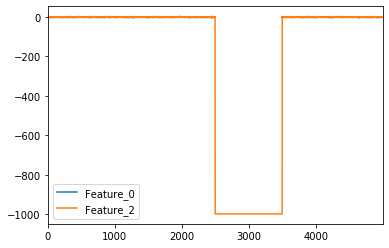

In [9]:
# plotando as colunas numericas
df.plot()
plt.show()

- Observações que levantamos olhando para o gráfico:
    - Com essa API de visualização do Pandas, usando o método .plot() direto no DataFrame, ele plota apenas as colunas numéricas
    - As colunas Feature_0 e Feature_2 são muito parecidas
    - Há um vale gigantesco nos dados da Feature_2. Num intervalo de dados eles ficam todos iguais e com valor próximo de -1000. Devemos questionar os donos dos dados sobre isso
    - Poderíamos separar os dois gráficos para uma melhor avaliação?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AAC876048>,
      dtype=object)

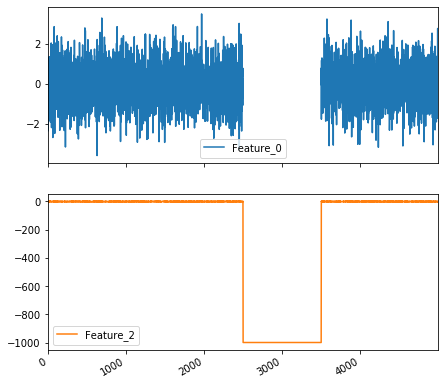

In [12]:
# plotando os gráficos separados
df.plot(subplots=True, figsize=(7, 7))
plt.show()

- Apesar dos dados faltantes, a coluna Feature_0 está aparentemente tudo OK
- A coluna Feature_2 tem aquele problema do vale com valores próximos de -1000, que aparentam estar no mesmo intervalo de observações da Feature_0, isso pode ser um padrão para perguntarmos para os donos dos dados
- Vamos olhar para os dados que aparecem na coluna Feature_2, no intervalo das linhas 2.500 até 3.500
- Veja que os valores aparentemente são todos -999
- O dono dos dados nos disse que isso é uma flag para dados faltantes. Podemos indicar isso já em tempo de leitura com a função read_csv() e o parâmetro na_values e acertar essa parte, já que o Pandas tratou esses dados como numéricos e não como faltantes, o que pode causar problemas na modelagem e nas suas conclusões

In [17]:
df.loc[2_500:3_500, 'Feature_2']

2500   -999.0
2501   -999.0
2502   -999.0
2503   -999.0
2504   -999.0
        ...  
3496   -999.0
3497   -999.0
3498   -999.0
3499   -999.0
3500   -999.0
Name: Feature_2, Length: 1001, dtype: float64

**PARÂMETRO na_values**
- Passamos para esse parâmetro um dicionário, onde a chave é o nome de uma ou mais colunas e os valores são as flags que nos indicam dados faltantes
- Podemos passar mais de um valor por coluna, para fazer isso é só colocar uma lista de valores que são considerados faltantes na chave correspondente

,Feature_0,Feature_1,Feature_2,Label
0,0.036435,1.192022418861353,-1.326348,0
1,-2.362614,0.999835110803413,-0.969421,0
2,-0.439421,0.4202877067824724,1.409511,1
3,-1.760930,-0.7317809156657651,-0.925953,0
4,-0.216907,1.3998695375029746,2.076070,1


,Feature_0,Feature_1,Feature_2,Label
4995,-0.393958,-1.7838043938979733,0.153619,1
4996,-1.720548,-0.6341833261618026,-1.121617,0
4997,-0.287575,0.9354108121251281,-0.804564,0
4998,0.978160,1.0806602274484232,0.947937,1
4999,0.228668,0.9039355800442616,-0.838433,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Feature_0    3999 non-null float64
Feature_1    5000 non-null object
Feature_2    3999 non-null float64
Label        5000 non-null object
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AD8F77EB8>,
      dtype=object)

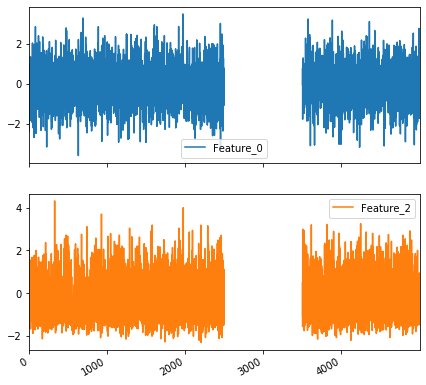

In [59]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_8.csv'

# leitura dos dados
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';', na_values={'Feature_2': -999})

# visualizando os dados
df.head()
df.tail()
df.info()
df.plot(subplots=True, figsize=(7, 7))
plt.show()

- **O QUE CONSEGUIMOS ARRUMAR NESSES DADOS:**
    - Tínhamos valores faltantes na coluna Feature_2. Esses valores que estavam com o valor -999 estavam sendo tratados como numéricos, ou seja, isso poderia atrapalhar nosso modelo e análise
    - Usando o parâmetro na_values, conseguimos arrumar essa questão e de quebra podemos levantar mais algumas perguntas:
        - Veja com a ajuda do método .info() que a quantidade de dados faltantes na Feature_0 e Feature_2 são iguais, mais ainda, elas estão nas mesmas linhas
        - Será que os outros dois dados podem estar com os mesmos problemas?
    - Vamos verificar?

In [28]:
df.loc[2_500:3_500, ['Feature_1', 'Label']]

,Feature_1,Label
2500,NAN,--
2501,NAN,--
2502,NAN,--
2503,NAN,--
2504,NAN,--
...,...,...
3496,NAN,--
3497,NAN,--
3498,NAN,--
3499,NAN,--


- Perguntando para o dono dos dados, descobrimos que 'NAN' e '--' também são valores faltantes. Vamos passar isso para o parâmetro na_values

,Feature_0,Feature_1,Feature_2,Label
0,0.036435,1.192022,-1.326348,0.0
1,-2.362614,0.999835,-0.969421,0.0
2,-0.439421,0.420288,1.409511,1.0
3,-1.760930,-0.731781,-0.925953,0.0
4,-0.216907,1.399870,2.076070,1.0


,Feature_0,Feature_1,Feature_2,Label
4995,-0.393958,-1.783804,0.153619,1.0
4996,-1.720548,-0.634183,-1.121617,0.0
4997,-0.287575,0.935411,-0.804564,0.0
4998,0.978160,1.080660,0.947937,1.0
4999,0.228668,0.903936,-0.838433,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Feature_0    3999 non-null float64
Feature_1    3999 non-null float64
Feature_2    3999 non-null float64
Label        3999 non-null float64
dtypes: float64(4)
memory usage: 156.4 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AB3AD4550>,
      dtype=object)

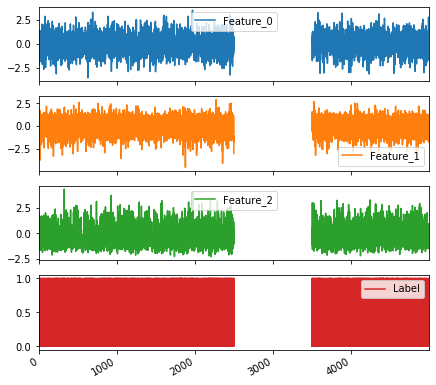

In [57]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_8.csv'

# leitura dos dados
dict_navalue = {'Feature_1': 'NAN', 'Feature_2': -999, 'Label': '--'} 
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';', na_values=dict_navalue)

# visualizando os dados
df.head()
df.tail()
df.info()
df.plot(subplots=True, figsize=(7, 7))
plt.show()

- **FINALMENTE**:
    - Todas as colunas têm a mesma quantidade de dados faltantes. Isso nem sempre ocorre e nem é um problema, aqui nesses dados específicos nós podemos excluir essas linhas que são totalmente vazias, já que elas não irão ajudar em nada.
    - Os dados faltantes ocorrem no mesmo intervalo de linhas
    - Nós fizemos tudo que poderíamos ter feito em tempo de leitura. O próximo passo é tratar e limpar esses dados faltantes